# Turing Machine and Deep Learning 2023

## Assignment Unupervised ML

This notebook is meant for you to review and reflect on the content of Lecture 3, which was mainly about unsupervised learning problems. As with last week, this notebook should not be too much quantitative work (lines of code) but keep in mind that running this notebook may take a longer time than you may be used to for python programs (*training good models take time!*)

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a folder called "Week 2" and copy this notebook and any other files or data that may be needed.
2. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Each one of the (sub-)questions below will be graded either 0 (insufficient), 1 (sufficient) or 2 (good). If $N$ is the number of sub-questions, and $p_i$ is your score for sub-question $i$, your total grade $G$ for this assignment is:
$$G=\frac{1}{2 N}\sum_{i=0}^{N}p_i$$

In [20]:
# load common libraries
import numpy as np                 # maths
import matplotlib.pyplot as plt    # plotting
import pandas as pd                # data manipulation
from tqdm import tqdm              # loading bar
from time import perf_counter      # timer

# Q1 Loading and preprocessing data

In this repository, you should find a file called `tmdb_5000_movies.csv` which is information from a subset of movies on The Movie Database.

### Q.1.1
Use pandas to read in the csv file (refer to [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you're unfamiliar).

In [153]:
import csv
df = pd.read_csv('tmdb_5000.csv')
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

View information about the dataset including datatypes and null values

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**Q.1.1.2** What columns have null values above? How would you be able to estimate the missing values?

We can see in the column "Non-Null Count" in the table above which columns don't have 4803 non null values, since that is the amount of instances (rows) we have. This means that the columns homepage, overview, release-date, runtime and tagline conttain null values. We could estimate these null values by comparing the instances that do contain null values to similar instances that did have a value in that particular column. We could also just give these null values the average of the values in that column.

### Q1.2
For this notebook, we're only interested in a few columns, specifically title, overview and genres. Set df to only contain those columns.

In [155]:
df = df[['title', 'overview', 'genres']]
df.info() # print out df info to verify

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   overview  4800 non-null   object
 2   genres    4803 non-null   object
dtypes: object(3)
memory usage: 112.7+ KB


### Q1.3
We see that some movies do not have an overview. Drop them from the table and reset the index (set `drop=True`).

In [156]:
df = df.dropna(inplace = False) # drop na values
df = df.reset_index(drop=True)
print(df)

                                         title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4795                               El Mariachi   
4796                                 Newlyweds   
4797                 Signed, Sealed, Delivered   
4798                          Shanghai Calling   
4799                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                          

# Q2 One-hot encodings
The following code processes the genres (which you see above are list of dictionaries) and encodes them into one-hot labels.

Remember, since we cannot do maths on text strings, we must change these words to numbers. Here, we create one-hot encodings for the genres. Assume we have three genres $[G_1, G_2, G_3]$. If a movie $M_1$ is tagged with genre $G_1$, the encoding is $[1,0,0]$. If another movie $M_2$ is tagged with $G2$, the encoding becomes $[0,1,0]$. Other encodings are possible as well, but one-hot encoding quite common and useful for many other tasks. In this case, if a movie is tagged with more than one genre, we'll just take a random one and encode that into a one-hot label.

### Q2.1 Processing genres

Finish the following code that processes genres into one-hot encodings.

In [157]:
np.random.seed(0)

def process_genre_string(gs):
    """ Processes genres into a single item from a list"""
    gs = eval(gs)
    gs = [x['name'] for x in gs]
    genre = "Unknown"
    if gs:
        genre = np.random.choice(gs) # choose random entry
    return genre

# TODO: Fill in
def encode_labels(label, unique_labels):
    """ Encodes text labels into a one-hot encoded list
        with possibly more than one one-hot per list.
        :param label: the label you want to one-hot encode
        :unique_labels: the vocabulary
    """
    out = np.zeros(len(unique_labels))
    out[unique_labels.index(label)] = 1
    return out

# save genres
processed_genres = []
for index, row in df.iterrows():
    processed_genres.append(process_genre_string(df["genres"][index]))

# sort and remove duplicates to get vocabulary
unique_genres = sorted(list(set(processed_genres)))

# add to dataframe as new column
df["proc_genres"] = processed_genres

# one-hot encode genres
enocded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    enocded_labels.append(encode_labels(processed_genres[index],unique_genres))

df["one_hot_genres"] = enocded_labels

100%|██████████| 4800/4800 [00:00<00:00, 30807.91it/s]


Verify that one-hot encodings are indeed as expected

In [158]:
df["one_hot_genres"][0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

### Q2.2 Processing Overviews
Next, we process the overviews. First, we remove all punctuation for the sake of simplicity and change each overview to use only lowercase. Then we need to see how long the overviews are in terms of numbers of words. We can do this with a histogram.

**Q2.2.1** Finish the following code

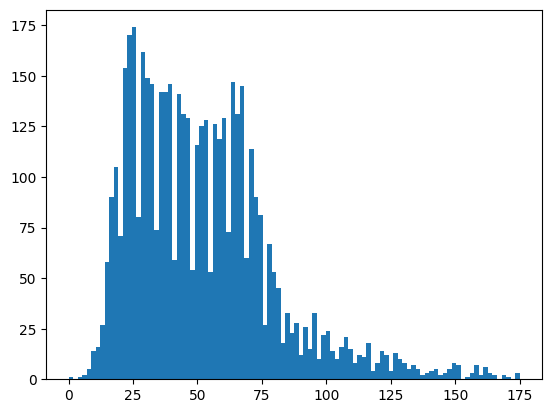

4399
Shortest overview from: The Helix... Loaded, overview =  , words: 0
1669
Longest overview from: The Promise, overview = An orphaned girl, driven by poverty at such a young age, makes a promise with an enchantress. In return for beauty and the admiration of every man, she will never be with the man she loves. This spell cannot be broken unless the impossible happens: snow falling in spring and the dead coming back to life. Now a grown and beautiful princess, she regrets her promise, for all of the men she's loved has always been met with tragedy. In love again with a man behind a red armor and a golden mask who rescues her from death, she is tormented by their inevitable parting. Meanwhile, Kunlun, the slave of a great general, is searching for the lost memories of a family he once had. Soon the fate of these two intertwine when the princess believes the general to be her hero, thus pulling him into this web of fate. What end will befallen our three characters? Are their fates alre

In [159]:
import re
def remove_punctuation(text):
    """ Only retains letters, numbers, underscores and whitespace """
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

processed_overviews = []

# loop over df, remove punctuation, make words lowercase and add it to a new column
for n in range(0, len(df)):
    intermediate = remove_punctuation(df["overview"][n])
    processed_overviews.append(intermediate.lower())


df["proc_overview"] = processed_overviews

# get the word lengths of each overview and store it in a list
overview_lens = []
for n in range(0, len(df)):
    overview_lens.append(len(processed_overviews[n].split()))

# for the sake of simplicity, add these values as a column to the df
df["overview_len"] = overview_lens
plt.hist(df['overview_len'], bins = 100)
plt.show()

indexOfMin = df["overview_len"].idxmin()
print(indexOfMin)
print("Shortest overview from: " + df["title"][indexOfMin] + ", overview = " + df["overview"][indexOfMin] + ", words: " + str(df["overview_len"][indexOfMin]))

indexOfMax = df["overview_len"].idxmax()
print(indexOfMax)
print("Longest overview from: " + df["title"][indexOfMax] + ", overview = " + df["overview"][indexOfMax] + ", words: " + str(df["overview_len"][indexOfMax]))

**Q2.2.2** What is the shortest overview? What is the longest? In the next step, we need to decide on a standard length of all overviews -- this means dropping overviews less than some value, and truncating longer ones. What length would you choose to minimize the number of movies dropped and maximize the information (words) stored in the overviews?

The shortest overview is from the movie "The Helix... Loaded", what I don't understand is why this movie still is in the dataset. I see that it has 0 words. The longest overview is from the movie "The Promise" and has 175 characters. Based on the histogram, I think overviews less than 20 can be deleted. There are namely few movies with overviews shorter than 20 words but with this length, a lot of movies need to have their overviews reduced by a lot.

### Q2.2.3
Let's choose overviews of length 15 words. What this means is we need to discard movies that have overviews less than 15 (there are other ways of dealing with it, but this should be fine for now) and truncate the higher ones to the first 15 words.

In [160]:
token_len = 15 # number of words
# only select rows where overview len is more than or equal to token_len
df = df[df["overview_len"] >= 15]
df = df.reset_index(drop=True)

# split each proc_overview into a list of words, select the first token_len words,
# and add the list of words back into df["proc_overview"]
between = []
for n in range(0, len(df)):
    between.append(df["proc_overview"][n].split()[:15])

# print to verify
df["proc_overview"]=between
df

,title,overview,genres,proc_genres,one_hot_genres,proc_overview,overview_len
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[in, the, 22nd, century, a, paraplegic, marine...",28
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Fantasy,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[captain, barbossa, long, believed, to, be, de...",34
2,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Action,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[a, cryptic, message, from, bonds, past, sends...",41
3,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[following, the, death, of, district, attorney...",65
4,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Adventure,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[john, carter, is, a, warweary, former, milita...",55
...,...,...,...,...,...,...,...
4702,Cavite,"Adam, a security guard, travels from Californi...","[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",Thriller,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[adam, a, security, guard, travels, from, cali...",115
4703,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",Crime,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[el, mariachi, just, wants, to, play, his, gui...",62
4704,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",TV Movie,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[signed, sealed, delivered, introduces, a, ded...",73
4705,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],Unknown,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[when, ambitious, new, york, attorney, sam, is...",65


### Q2.2.3 Finding the vocabulary length

In order to one-hot encode words, we need to find how many words there are in total, just like in the case of genres. Get all the words, remove duplicates, and sort. Find and print the length of your vocabulary.

In [161]:
# hint: store all words for all movies in a set, change it to a list and sort
stored = []
for n in range(0,len(df)):
    for m in range(0,15):
        stored.append(df["proc_overview"][n][m])

stored = list(dict.fromkeys(stored))
vocab_len = len(stored)
print(vocab_len)

12493


### Q2.2.4 Encoding the labels

In the case of genres, we one-hot encoded the outputs by taking a single random genre. However, an alternative method is to add up the one-hot encodings to form some kind of histogram. For example, if we have an overview "a brown dog", and our vocab is \[a brown, big, cabbage, dog, goat, cow, turkey\], the one-hot vector would be \[1,1,0,0,1,0,0,0\]. If our overview is "a big brown dog", the one-hot vector would be \[1,1,1,0,1,0,0,0\]. If our overview is "a big big brown dog", the one-hot vector would be \[1,1,2,0,1,0,0,0\]. You can use the `encode_labels` function that you defined earlier.

In [162]:
# this code is just a hint, if you want you can do it as you please
# as long as the output remains the same
encoded_labels = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    sentence_encode = [] # set of encodings for this overview
    for word in row["proc_overview"]:
        sentence_encode.append(encode_labels(word, stored)) # get encoding for this word
    sentence_encode = np.sum(sentence_encode, axis = 0)# sum over axis=1
    encoded_labels.append(sentence_encode)

df["one_hot_overview"] = encoded_labels
print(encoded_labels)
print(df["one_hot_overview"]) # print to verify

100%|██████████| 4707/4707 [00:03<00:00, 1560.60it/s]


[array([1., 2., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([1., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 3., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 3., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([1., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 

**Q2.2.5** Each vector is a vector of floating point (64-bit) numbers. Assuming each float takes up exactly 16-bytes, how many bytes does this take to store (theoretically)?

since every vector is 12493 numbers long and we have 4706 vectors and every number takes 16 bytes to store, we have 16 * 12493 * 4706 bytes in use. This is approximately 941 MB.

# Q3 Principal Component Analysis

**Q3.1** Using the overview encoded into one-hot encodings, perform PCA and plot this into a 2-D image as a scatter plot.

<ipython-input-163-f6bf9b9a226e>:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], cmap='tab10', alpha=0.6, s=1)


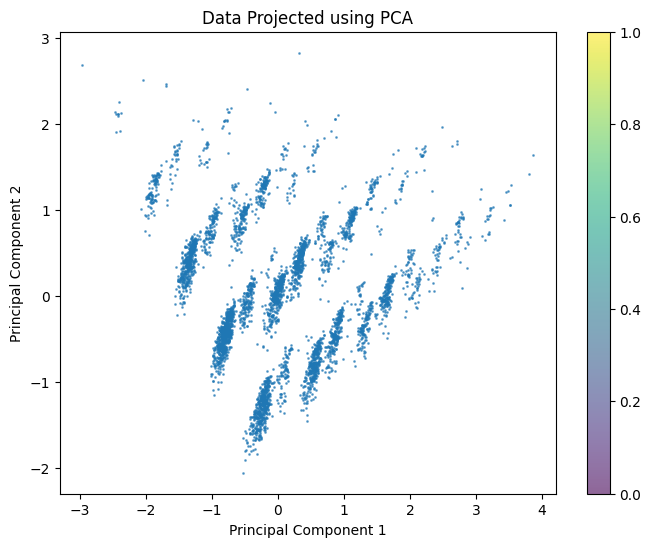

In [163]:
# import PCA decomposition class from sklearn
from sklearn.decomposition import PCA

# we did exactly this in the lecture notebook
# Set up PCA object
pca = PCA(n_components=2)  # Set the desired number of components
# Perform covariance matrix computation and eigendecomposition,
# and project data to lower dimension
x_train_pca = pca.fit_transform(encoded_labels)

# Plotting the projected data
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], cmap='tab10', alpha=0.6, s=1)
plt.colorbar()
plt.title('Data Projected using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Q3.2** Do you see any interpretable structure in the above plot ("interpretable" $\rightarrow$ the patterns are explainable).

Yes the data seem to be in a weird claw. there seem to be a lot of clusters which all are spread from slightly left bottom to slighty right above. The cluster centroids seem to be on multiple diagonal lines like y=x+b.

**Q3.3** Quantify how much variance information a 2D PCA projection loses for this dataset.

around 95%, this is seen in the yellow line in the graph beneath at x = 2.

**Q3.4** Plot a line graph where the y-axis is cumulative explained variance ratio and the x-axis is the number of PCA components.

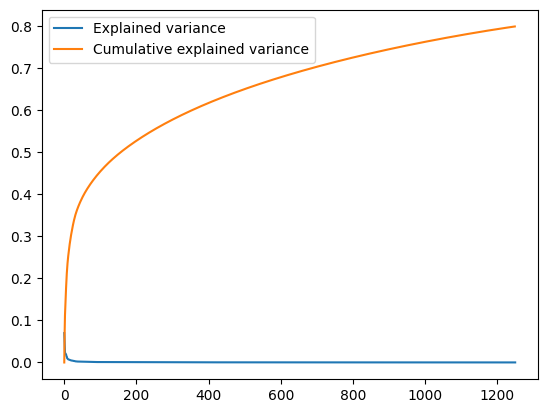

In [14]:
# Set up PCA object with the desired number of components

pca = PCA(n_components=1250)  # Set the desired number of components
# perform covariance matrix computation
# and eigendecomposition
x_train_pca = pca.fit(encoded_labels)
# print(pca.explained_variance_)

powers = pca.explained_variance_ratio_
# print(powers[:2])
plt.plot(powers, label="Explained variance")
plt.plot([np.sum(powers[:i]) for i in range(len(powers)-1)], label="Cumulative explained variance")
plt.legend()
plt.show()

**Q3.5** How many principal components do you need in order to explain 80% of the total variance in the data?

Note: don't just estimate it by eye, write some code to compute it for you.

In [ ]:
#sorry I really don't know how this can be done.

ValueError: object too deep for desired array

The orange line reaches a level of 0.8 roughly at 1200 principal components. This means the model needs roughly 1200 principal components to explain 80% of the models variance

**Q3.6** Using the number of dimensions you found in Q3.5, fit and transform your overview encodings using PCA and add it to a new column called `overview_pca` in the dataframe.

In [88]:
n_dims = 1200
# for a strange reason my df["one_hot_overview"] doesn't work but my encoded_labels does while they must be the same
pca = PCA(n_components=n_dims)
print(encoded_labels)
print(df["one_hot_overview"])
labels_pca = pca.fit_transform(encoded_labels)
labels_pca = labels_pca.tolist()
df["overview_pca"] = labels_pca
#print(labels_pca)
print(df)

[array([1., 2., 1., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([1., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([1., 3., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 3., 0., ..., 0., 0., 0.]), array([0., 0., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([0., 2., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([1., 0., 0., ..., 0., 0., 0.]), array([0., 1., 0., ..., 0., 0., 0.]), array([0., 

# Q4 K-Means Clustering

**Q4.1** Cluster the movies based on the features that were extracted via PCA in the last step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_kmeans`. Print out the elements of cluster number 0 from the dataframe.

In [89]:
# import KMeans class
from sklearn.cluster import KMeans
# for the same strange reason my df["overview_pca"] doesn't work but my label_pca does while they must be the same

# Perform K-means clustering
kmeans = KMeans(n_clusters=20)
# fit model
print(df["overview_pca"])
print(labels_pca)
kmeans.fit(labels_pca)

y_preds = kmeans.predict(labels_pca)# get predictions
df["cluster_kmeans"] = y_preds # set predictions
print(y_preds)


print("the values which were placed in cluster 0")

print(np.where((df["cluster_kmeans"] == 0)))
x_extra = np.where((df["cluster_kmeans"] == 0))

print("title of movies in cluster 0")
for val in x_extra:
     print(df["title"][val])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[14  1 16 ...  3  1 12]
the values which were placed in cluster 0
(array([   3,    9,   11,   28,   41,   50,   71,   88,   90,  120,  151,
        219,  224,  287,  329,  350,  405,  421,  429,  467,  536,  569,
        578,  589,  595,  605,  625,  663,  675,  679,  690,  697,  710,
        714,  725,  744,  752,  779,  781,  785,  821,  862,  865,  889,
        890,  902,  912,  930,  947,  953,  955,  983,  992,  996, 1051,
       1071, 1098, 1101, 1135, 1146, 1265, 1281, 1283, 1284, 1295, 1308,
       1314, 1350, 1352, 1405, 1416, 1433, 1440, 1481, 1486, 1532, 1557,
       1570, 1594, 1595, 1607, 1616, 1632, 1633, 1640, 1641, 1645, 1754,
       1772, 1836, 1843, 1877, 1950, 1953, 1955, 1958, 1962, 1965, 1979,
       1996, 2012, 2058, 2067, 2070, 2079, 2144, 2146, 2163, 2179, 2193,
       2204, 2239, 2267, 2269, 2288, 2292, 2301, 2312, 2323, 2346, 2406,
       2431, 2442, 2470, 2475, 2476, 2483, 2497, 2518, 2561, 2575, 2623,
       2641, 2642, 2659, 2671, 2674, 2696, 2706, 2736, 27

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't?

While men in black, skyfall, avengers and spider man can be sorted together, I don't think it is a good sorting if you also put monsters university and on the downlow in this cluster.

**Q4.3** Now, we'll figure out whether using the elbow method is right for this dataset. Plot a loss (using `kmeans.inertia_`) versus cluster size plot. Is there an elbow that you see clearly? What cluster size would you choose?

There is an elbow which can be seen but the plot isn't superclear. I think that the most predominant offset/nod is at k=3, but since the error still reduces rapidly between 3,4 and 5, I would choose to set K=5 since the WCSS is much smaller here.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

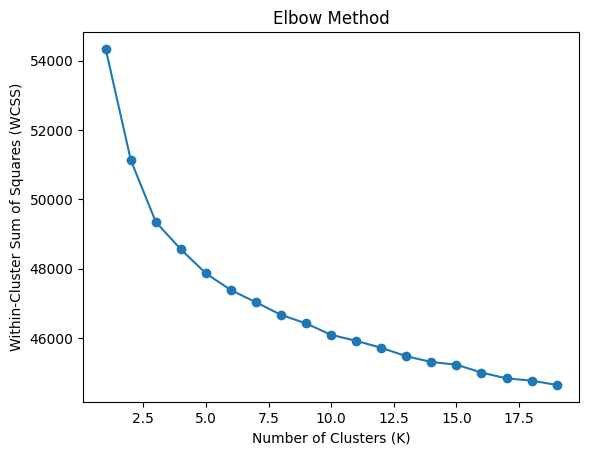

In [68]:
# Perform K-means clustering for different values of K
wcss = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(labels_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

# Q5 Gaussian Mixture Models

**Q5.1** As with the K-means above, cluster the movies based on the features that were extracted via PCA in a previous step. Set $K=20$. Add the predicted cluster into the dataframe as a new column called `cluster_gmm`. Print out the elements of a single cluster of your choice from the dataframe.

In [90]:
# import GMM class
from sklearn.mixture import GaussianMixture

# Perform K-means clustering
gmm = GaussianMixture(20)
gmm.fit(labels_pca)

#the cluster of my choice is 12


y_preds2 = gmm.predict(labels_pca)
print(np.where(y_preds2 == 12))
x_extra = np.where((y_preds2 == 12))

print("title of movies in cluster: 12")
for val in x_extra:
     print(df["title"][val])



(array([  56,   83,  133,  217,  229,  249,  256,  291,  333,  334,  361,
        385,  388,  594,  603,  621,  631,  659,  681,  690,  701,  732,
        823,  832,  833,  852,  872,  901,  912,  991, 1041, 1046, 1047,
       1053, 1094, 1096, 1101, 1146, 1173, 1218, 1281, 1288, 1317, 1408,
       1433, 1439, 1472, 1473, 1481, 1500, 1631, 1654, 1669, 1681, 1713,
       1781, 1843, 1889, 1894, 1909, 1913, 1959, 1972, 2020, 2022, 2025,
       2060, 2119, 2143, 2146, 2156, 2157, 2200, 2215, 2231, 2252, 2268,
       2276, 2282, 2290, 2310, 2327, 2347, 2354, 2389, 2443, 2471, 2499,
       2580, 2621, 2630, 2634, 2644, 2654, 2676, 2743, 2744, 2763, 2766,
       2774, 2842, 2843, 2884, 2931, 2953, 2958, 2982, 2987, 3003, 3048,
       3074, 3089, 3116, 3151, 3159, 3228, 3306, 3450, 3466, 3486, 3500,
       3519, 3532, 3565, 3575, 3577, 3634, 3643, 3671, 3676, 3682, 3718,
       3725, 3777, 3810, 3838, 3947, 3966, 3979, 3980, 4032, 4039, 4066,
       4102, 4107, 4116, 4149, 4151, 4205, 4268, 4

**Q4.2** Does this clustering seem alright to you (based on your movie watching history)? Are there movies that go well together and movies that don't? How does this compare to K-Means Clustering?

It is promising to see that monsters Inc and Monsters University are in the same cluster. Also to have Rio 2 and Narnia in here also does not seem to be that bad. All films are either an animated movie or kind of a fairytale. A mission impossible film is ofcourse something totally different thus not all films are sorted as good. Also the last 5 films in the cluster are very different each. I don't think this cluster is necceasiry better than the previous k_means clustering. I would say they perform equally bad.

**Q4.3** Let's check out the size of the clusters. Create a double bar plot (**as you did in the last assignment**) showing the different sizes of the clusters.

*Hint: you may want to consider `df.value_counts()` if you're unfamiliar.*

3     359
6     328
1     320
19    315
7     281
17    272
16    265
13    262
4     243
0     241
14    239
12    231
9     216
8     209
2     175
5     167
10    166
15    161
18    148
11    109
dtype: int64


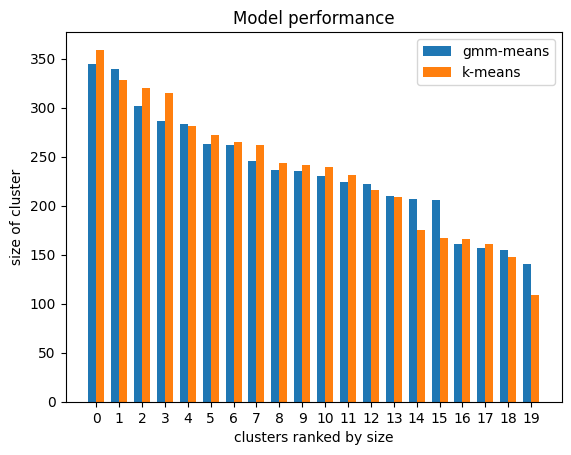

In [93]:
# Create an array for the x-axis positions
# Plotting the bars
# Add labels, title, and legend

model_names = range(0,20)
bar_width = 0.35

# Create an array for the x-axis positions
x = np.arange(len(model_names))
df2 = pd.DataFrame(data = y_preds2)
df1 = pd.DataFrame(data = y_preds)
df2 = df2.value_counts()
df1 = df1.value_counts()
print(df1)
# Plotting the bars
fig, ax = plt.subplots()
bar1 = ax.bar(x, df2, width=bar_width, label="gmm-means") # training accuracy: don't forget to add labels
bar2 = ax.bar(x+bar_width, df1, width=bar_width, label="k-means") # testing accuracy

# Add labels, title, and legend
ax.set_xlabel("clusters ranked by size")
ax.set_ylabel("size of cluster")
ax.set_title("Model performance")
# set proper x ticks: I'll help you with this one
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(model_names)
ax.legend()
plt.show()

**Q4.4** Do you see a significant difference in the sizes of the clusters? Which is more uniform? Any thought on why?

The k-means clusters are usually a bit bigger than the gmm clusters. I would say there is a significant difference between the 4 biggest clusters compared, but after that the differences are so minor that it doesn't matter that much. I would say the gmm clusters are a bit more uniform because the differences in size is less big between them. This depends all on the data, if all data were evenly spread out, k means and gmm would give the same result since the density plot would then be the same everywhere. Since k-means clusters tend to be a bit bigger, I suppose the data has different variances between (real) clusters.

# Q6: A very simple recommender system

One useful thing that clustering is often used for (though at a much greater complexity) is in **recommender systems**. These are systems with users and items (movies, files, documents, etc.), where new items are shown to the user based on what they've previously interacted with, and possibly also on the behaviour of other users.

**Q6.1** Assume your dentist has just watched the movie Avatar and asks you for a recommendation. Lucky for you, you just finished this assignment. Using the cluster indices of the movie Avatar for both the K-means and GMM methods, print out suggestions for new movies.

In [95]:
prev_watch = "Avatar"

save = 0
# print out similar movies
for n in range(0,len(df)):
  if df["title"][n] == "Avatar":
    save = n

y_preds2 = gmm.predict(labels_pca)
x_extra = np.where((y_preds2 == y_preds2[n]))

print("title of movies from gmm")
for val in x_extra:
     print(df["title"][val])


y_preds = kmeans.predict(labels_pca)# get predictions
x_extra2 = np.where((y_preds == y_preds[n]))

print("title of movies from k means")
for val in x_extra2:
     print(df["title"][val])



title of movies from gmm
15               The Chronicles of Narnia: Prince Caspian
52      Indiana Jones and the Kingdom of the Crystal S...
75                            G.I. Joe: The Rise of Cobra
79                            Snow White and the Huntsman
84                    Captain America: The Winter Soldier
                              ...                        
4513                                            Rotor DR1
4617                            A Charlie Brown Christmas
4638                                Indie Game: The Movie
4664                                        Bending Steel
4706                                    My Date with Drew
Name: title, Length: 210, dtype: object
title of movies from k means
52      Indiana Jones and the Kingdom of the Crystal S...
56                                                 WALL·E
69                                         Wild Wild West
82                                             The Lovers
83                                  

**Q6.2** Are any of the two recommender systems any good? Would you use them if your real dentist asks for a movie suggestion?

No I would not consider them good, also if my dentist asked me for a movie-advice I would not send him more then 200 recommendations.

**Q6.3** How would you try making the recommender systems better?

I think the best way to use more reliable results is if we could merge these 2 clusters and only keep the movies that are in both. In this way, if close movies are in both clusters chances are high that they are really similar. What we could also do is cluster not only on overview encoding but also on other factors like genre and title.

**Q6.4** Say your dentist likes the movies you suggested and has watched a few more since you met him last. How would you incorporate this fact (recommendation based on multiple movies) into your suggestions?

I would look for similarities between movies and give these similarities a higher priority when looking for another movies

**Q6.5** An alternative method for recommendations is to use your encoded movie-feature vectors (in this case your overview+PCA vector) in order to find out what movie may be most similar to the current one. In the case of K-Means and GMMs, "similarity" referred to Euclidean distance. However, in this exercise, we will use *cosine similarity*, which is another very common similarity measure, and is related to the angle between two vectors. It is defined as:

$$sim(v_1, v_2)=\frac{v_1\cdot v_2}{||v_1||\cdot||v_2||}$$

Where $v_1$ and $v_2$ are vectors and the operator $||\cdot||$ is the norm of the vector. The function ranges from $[-1,1]$ (where 1 means that the vectors point in the same direction).

Define an appropriate function `cosine_sim`. Add a column called `cos_sim_to_avatar` in the df and print out the head of the df, sorted by the similarity. What movies would you recommend now? Is this better than the clustering methods?

In [ ]:
# I do not understand how to implement both my overview and pca vector for this cosine measurement function

def cosine_sim(v1, v2):
    return np.dot(v1, v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))

# get overview_pca encoding of previously watched film
prev_watch_enc = ...

sims = [] # set up place to store similarities
for i, row in df.iterrows():
    sims.append(...)

df["cos_sim_to_avatar"] = ...
df = df.sort_values(...) # sort df
df # print to verify

*Your text answer here*

# Q7 Unsupervised Learning as a Tool

At the end of this brief forey into natural language processing, we will end with an interesting task: can a machine predict the genre of a movie based purely on the first 10 words of its overview?

First, the following cell shuffles the dataset and splits it into a training and test set. The random seed and random state ensure that the train and test samples are the same for you all the time, and *probably* your classmates too. You can verify this by printing out the dataframes and checking it for yourself.

In [164]:
np.random.seed(0)
n_train = int(0.8*len(df))
df_shuffle = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_train = df_shuffle[:n_train].reset_index(drop=True)
df_test = df_shuffle[n_train:].reset_index(drop=True)
print(len(df_train), len(df_test))

3765 942


## Train, test, evaluate

Using a supervised learning method of your choice, try predicting the genre of a movie from the overview. The way you preprocess your data is up to you, and you can take inspiration from the above exercises (e.g. PCA on the one-hot encodings as input, one-hot label encodings as output). There are a number of hyperparameters you can choose depending on your selected method (number of words in your overview, number of dimensions, number of clusters, hyperparameters of your supervised model...), thus, make sure to perform hyperparameter optimization in some way (grid-search, fine-tuning, etc). Once you are happy with how your model is performing, **print out the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model**.

If you are already excited about neural networks, you may also choose to use that as your supervised method. The easiest way to do it is with sklearn's `MLPClassifier` module. The main hyperparameter you would need to tune is the architecture of your model -- how many hidden layers, and how large is each one. For this task, in order to get best performance, you do not necessarily need an MLP (multi-layer perceptron) but feel free to experiment.

*Hint: the `train_and_eval` function from the last assignment should be of great help here*

In [165]:
from sklearn.ensemble import RandomForestClassifier as RFC
train_acc_mean, train_acc_std = np.zeros((6, 5)), np.zeros((10, 8))
test_acc_mean, test_acc_std = np.zeros((6,5)), np.zeros((10,8))

n_trees = np.arange(10,61,10)
depths = np.arange(1,10,2)

train_y = df_train["proc_genres"]
test_y = df_test["proc_genres"]
df_train = df_train.drop("proc_genres", axis='columns')
df_train = df_train.drop("genres", axis='columns')
df_train = df_train.drop("one_hot_genres", axis='columns')
df_test = df_test.drop("proc_genres", axis='columns')
df_test = df_test.drop("genres", axis='columns')
df_test = df_test.drop("one_hot_genres", axis='columns')

df_train = df_train.drop("title", axis='columns')
df_train = df_train.drop("overview", axis='columns')
df_train = df_train.drop("proc_overview", axis='columns')
df_test = df_test.drop("title", axis='columns')
df_test = df_test.drop("overview", axis='columns')
df_test = df_test.drop("proc_overview", axis='columns')
extra = pd.DataFrame(df_train['one_hot_overview'].tolist())
newSet = pd.concat([df_train, extra], axis = 1, join='inner')

extra2 = pd.DataFrame(df_test['one_hot_overview'].tolist())
newSet2 = pd.concat([df_test, extra2], axis = 1, join='inner')
newSet = newSet.drop("one_hot_overview", axis="columns")
newSet2 = newSet2.drop("one_hot_overview", axis="columns")
newSet= newSet.rename(str,axis="columns")
newSet2= newSet2.rename(str,axis="columns")

for tree_idx, n_trees in tqdm(enumerate(n_trees), total=len(n_trees)):
    for d_idx, d in enumerate(depths):
        train_perfs = []
        test_perfs = []
        for n in range(5):
            modelRFC = RFC(n_trees, max_depth=d) # init new model
            modelRFC = modelRFC.fit(newSet, train_y) # train model
            train_perfs.append(modelRFC.score(newSet, train_y)) # store interem values
            test_perfs.append(modelRFC.score(newSet2, test_y)) # store interem values
        train_acc_mean[tree_idx][d_idx] = np.mean(train_perfs)
        train_acc_std[tree_idx][d_idx] = np.std(train_perfs)
        test_acc_mean[tree_idx][d_idx] = np.mean(test_perfs)
        test_acc_std[tree_idx][d_idx] = np.std(test_perfs)

100%|██████████| 6/6 [01:21<00:00, 13.53s/it]


Write a paragraph of ~150 words about how you went about selecting and tuning your model, and how you may want to make improvements to your model if you were to continue working on this. Plots are very good but not strictly necessary (i.e. try to add plots if you can).

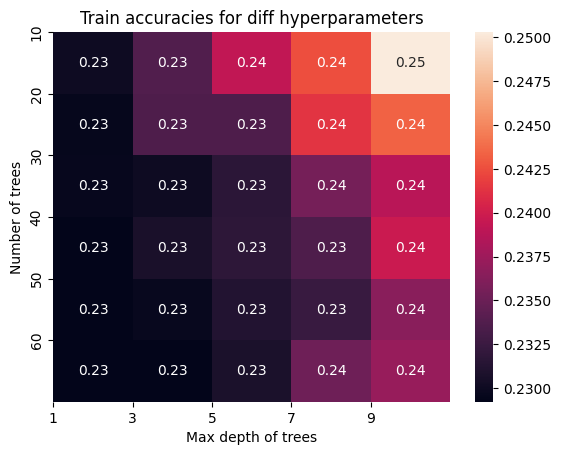

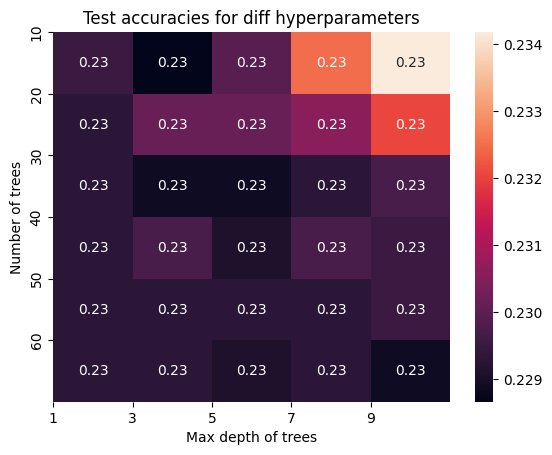

In [166]:
import seaborn as sns
# Figure 1
plt.figure()
sns.heatmap(train_acc_mean, annot=True) # create seaborn heatmap with annotations
# add proper xticklabels and yticklabels
plt.ylabel("Number of trees")
plt.xlabel("Max depth of trees")
plt.yticks(ticks=np.arange(0,6), labels=np.arange(10,61,10))
plt.xticks(np.arange(0,5), depths)
# add a title
plt.title("Train accuracies for diff hyperparameters")
plt.show()

# Figure 2
plt.figure()
# create seaborn heatmap with annotations
sns.heatmap(test_acc_mean, annot=True)
# add proper xticklabels and yticklabels
plt.ylabel("Number of trees")
plt.xlabel("Max depth of trees")
plt.yticks(np.arange(0,6), np.arange(10,61,10))
plt.xticks(np.arange(0,5), depths)
# add a title
plt.title("Test accuracies for diff hyperparameters")
plt.show()

My model works pretty straighforward. The supervised model I decided to use is the random forest. I chose for this model becuase it is known to train on data fast and since it can provide us with good results. Unfortunately after playing around, I noticed that I had to drop a lot of columns from our original database in order to make it to work since they really on integer data and not on (so many) different strings. The model now only looks at the one_hot_overviews calculated in question 2.2.4. The model first needs to explode this array into multiple columns such that the decision tree can better make a prediction about the data we provided. The x_train dataset thus has now more than 12000 columns. The genres are saved from the original database and are provided to the random forest in the training fase. We can see that the model performed surprisingly well on our data, although it still guessed only 23% of our data correct. For further exploration of the random forest on our dataset, we could try to make the overview encodings longer (longer than 15 words) which would bring in more words to our decision tree. Also extending the size of the trees could be an easy way to get better scores. We could also try to encode the titles to see if that gives some information to our model.

# BONUS

If you are happy with your score and wish to see how well it is doing with respect to other people (a sort of mini-competition), fill out the following form with the train_score (accuracy$\in[0,1]$), test_score (accuracy$\in[0,1]$), mean training time (in seconds), and mean inference time (in seconds) of your model, as well as what method you use. You can submit as many times before the deadline as you wish. Your final results will be correlated with your submission in order to validate your results (if we cannot validate them, they will be immediately disqualified).

[FORM HERE](https://forms.gle/rXRtXScABH5oDLRWA)